<a href="https://colab.research.google.com/github/muhammedafsalpm/ICT-Academy-of-Kerala/blob/main/Virtual_Competition_2_ICT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Virtual Competition 2

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the datasets
test_data = pd.read_csv('/content/test_lAUu6dG.csv')
train_data = pd.read_csv('/content/train_ctrUa4K.csv')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         6

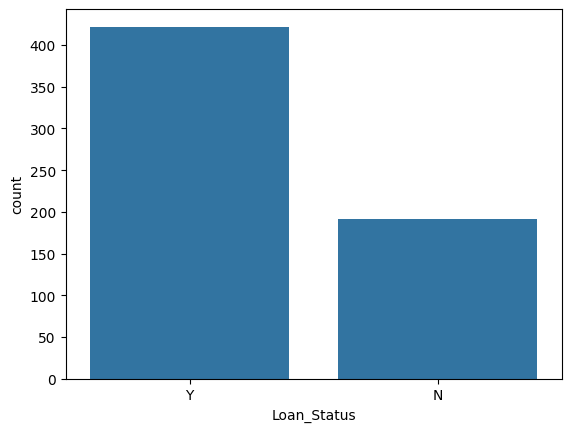

In [13]:
# Exploratory Data Analysis (EDA)
# Train Dataset EDA
print(train_data.info())
print(train_data.describe())
sns.countplot(x='Loan_Status', data=train_data)
plt.show()


In [14]:

# Pre-processing
# Handle missing values for train and test datasets separately
imputer = SimpleImputer(strategy='mean')

# Ensure missing values are imputed for numeric columns
for column in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    train_data[column] = imputer.fit_transform(train_data[[column]])
    test_data[column] = imputer.transform(test_data[[column]])

# Handle categorical variables
label_enc = LabelEncoder()
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    train_data[column] = label_enc.fit_transform(train_data[column].astype(str))
    test_data[column] = label_enc.transform(test_data[column].astype(str))

In [15]:
# Check for NaN values in the train and validation datasets
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in X_val:", np.isnan(X_val).sum())

# If NaN values are present, inspect and handle them
if np.isnan(X_train).sum() > 0:
    print("Columns with NaN values in X_train:")
    for col in X.columns:
        if np.isnan(X_train[:, X.columns.get_loc(col)]).sum() > 0:
            print(f"{col} has NaN values")

# If no NaN values are present, proceed with model training
if np.isnan(X_train).sum() == 0 and np.isnan(X_val).sum() == 0:
    # Modeling
    # Logistic Regression
    logit_model = LogisticRegression()
    logit_model.fit(X_train, y_train)
    y_val_pred = logit_model.predict(X_val)
    print(f'Logistic Regression Accuracy: {accuracy_score(y_val, y_val_pred)}')
    print(classification_report(y_val, y_val_pred))

    # Random Forest
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    y_val_pred = rf_model.predict(X_val)
    print(f'Random Forest Accuracy: {accuracy_score(y_val, y_val_pred)}')
    print(classification_report(y_val, y_val_pred))


NaN values in X_train: 0
NaN values in X_val: 0
Logistic Regression Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Random Forest Accuracy: 0.7804878048780488
              precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.76      0.96      0.85        80

    accuracy                           0.78       123
   macro avg       0.81      0.70      0.72       123
weighted avg       0.80      0.78      0.76       123



In [11]:
# Encoding Loan_Status column in the train dataset
train_data['Loan_Status'] = train_data['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)

# Split data into features (X) and target (y)
X = train_data.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_data['Loan_Status']

# Ensure the same pre-processing is applied to the test dataset
X_test_final = test_data.drop(columns=['Loan_ID'])

# Train-test split on the train dataset for model evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test_final = scaler.transform(X_test_final)

# Check for NaN values in the train and validation datasets
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in X_val:", np.isnan(X_val).sum())

# If NaN values are present, inspect and handle them
if np.isnan(X_train).sum() > 0:
    print("Columns with NaN values in X_train:")
    for col in X.columns:
        if np.isnan(X_train[:, X.columns.get_loc(col)]).sum() > 0:
            print(f"{col} has NaN values")

# If no NaN values are present, proceed with model training
if np.isnan(X_train).sum() == 0 and np.isnan(X_val).sum() == 0:
    # Modeling
    # Logistic Regression
    logit_model = LogisticRegression()
    logit_model.fit(X_train, y_train)
    y_val_pred = logit_model.predict(X_val)
    print(f'Logistic Regression Accuracy: {accuracy_score(y_val, y_val_pred)}')
    print(classification_report(y_val, y_val_pred))

    # Random Forest
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    y_val_pred = rf_model.predict(X_val)
    print(f'Random Forest Accuracy: {accuracy_score(y_val, y_val_pred)}')
    print(classification_report(y_val, y_val_pred))

    # Fine-tuning (example with Random Forest)
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f'Best Parameters: {grid_search.best_params_}')

    # Final model using the best estimator
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    # Predictions on the test dataset
    y_test_pred = best_model.predict(X_test_final)

    # Replace 'Loan_Status' in sample submission with predictions
    submission = pd.read_csv('/content/sample_submission_49d68Cx.csv')
    submission['Loan_Status'] = ['Y' if x == 1 else 'N' for x in y_test_pred]

    # Save the submission file
    submission.to_csv('/content/final_submission.csv', index=False)


NaN values in X_train: 0
NaN values in X_val: 0
Logistic Regression Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Random Forest Accuracy: 0.7804878048780488
              precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.76      0.96      0.85        80

    accuracy                           0.78       123
   macro avg       0.81      0.70      0.72       123
weighted avg       0.80      0.78      0.76       123

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
